In [130]:
# ## Import Libraries
# import pandas as pd
# import numpy as np
# from datetime import datetime
# from selenium import webdriver
# import json
# import string
# from colour import Color
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# from time import sleep

# ## Connect Chrome Driver
# driver = webdriver.Chrome('/Users/joel/selenium_drivers/chromedriver 3')

# ## Scraping Code

# driver.get('https://docs.google.com/spreadsheets/d/18oVRrHj3c183mHmq3m89_163yuYltLNlOmPerQ18E8w/htmlview?sle=true#')
# sleep(3)
# driver.find_element_by_partial_link_text('States daily').click()
# table = driver.find_element_by_xpath('//*[@id="916628299"]/div/table/tbody')
# rows = table.find_elements_by_tag_name('tr')
# columns = rows[0].find_elements_by_tag_name('td')
# rows = rows[2:]

# ## Update Data
# with open('coronavirus.json') as f:
#     data = json.load(f)
#     state = data['state']

#     date_  = []
#     state_ = []
#     positive_ = []
#     negative_ = []
#     pending_ = []
#     hospitalization_ = []
#     death_ = []
#     total_ = []
    
#     for row in rows:
#         cells = row.find_elements_by_tag_name('td')

#         date_ob = cells[0].text
#         state_ob= cells[1].text
#         positive_ob = cells[2].text
#         negative_ob = cells[3].text
#         pending_ob = cells[4].text
#         hosp_ob = cells[5].text
#         death_ob = cells[6].text
#         total_ob = cells[7].text
#         if not hosp_ob:
#             hosp_ob = ''

#         date_.append(date_ob)
#         state_.append(state_ob)
#         positive_.append(positive_ob)
#         negative_.append(negative_ob)
#         pending_.append(pending_ob)
#         hospitalization_.append(hosp_ob)
#         death_.append(death_ob)
#         total_.append(total_ob)
        
#     state['Date'] = date_
#     state['State'] = state_
#     state['Positive'] = positive_
#     state['Negative'] = negative_
#     state['Pending'] = pending_
#     state['Hospitalized'] = hospitalization_
#     state['Deaths'] = death_ 
#     state['Total'] = total_

# ## Save Data
# with open('coronavirus.json', mode='w', encoding='utf-8') as f:
#     json.dump(data, f)


# ## Create Daily Aggregate Data   
# with open('coronavirus.json') as f:
#     data = json.load(f)
#     state = data['state']


# df = pd.DataFrame(state)
# df = df.set_index('Date')
# df.index = pd.to_datetime(df.index)

# for column in df.columns:
#     df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# df = df.replace('', np.nan)

# columns = df.columns

# columns = columns.drop('State')

# for column in columns:
#     df[column] = df[column].astype(float)

# grouped = df.groupby(pd.Grouper(freq='D')).sum()

# collected = []
# for idx in grouped.index.unique():
#     day = df.loc[idx]
#     count = len(day[day.Positive > 0])
#     collected.append(count)

# grouped['state_count'] = collected


# data['daily_summary']['Date'] = ['{}/{}/{}'.format(x.month,x.day, x.year) for x in grouped.index]
# data['daily_summary']['Positive'] = grouped.Positive.tolist()
# data['daily_summary']['Negative'] = grouped.Negative.tolist()
# data['daily_summary']['Pending'] = grouped.Pending.tolist()
# data['daily_summary']['Hospitalized'] = grouped.Hospitalized.tolist()
# data['daily_summary']['Total'] = grouped.Total.tolist()
# data['daily_summary']['Confirmed States'] = grouped.state_count.tolist()

# with open('coronavirus.json', mode='w', encoding='utf-8') as f:
#     json.dump(data, f)

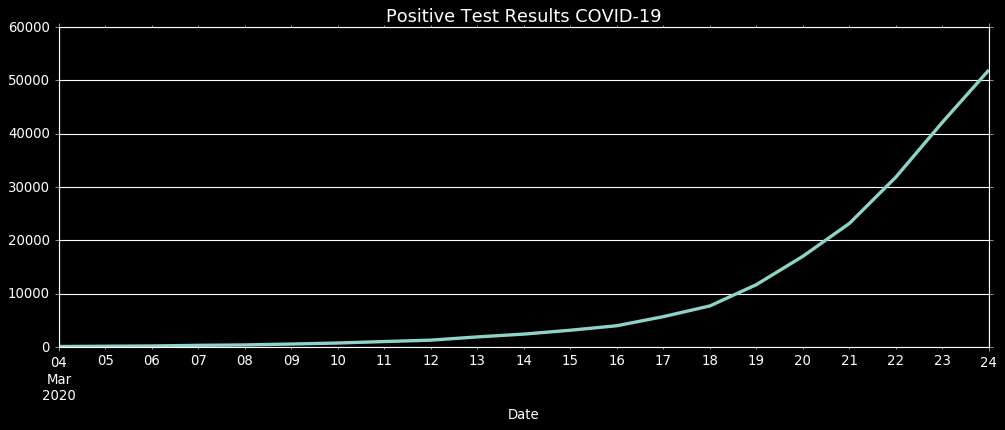

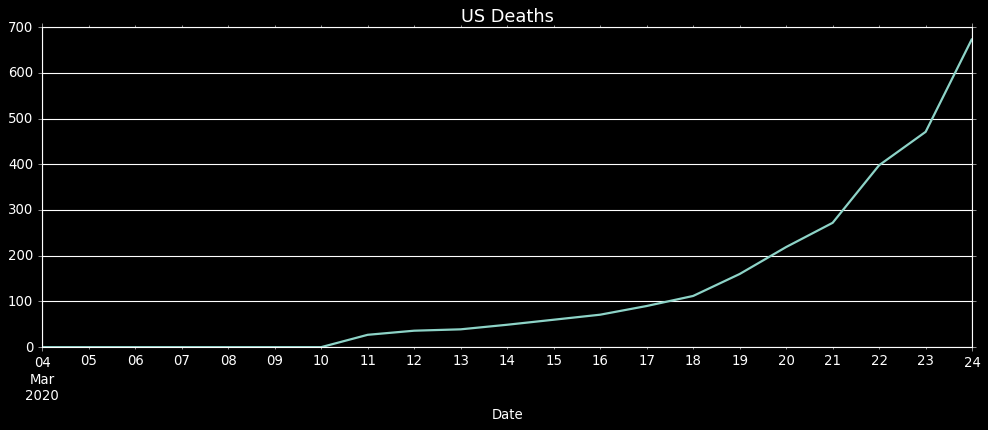

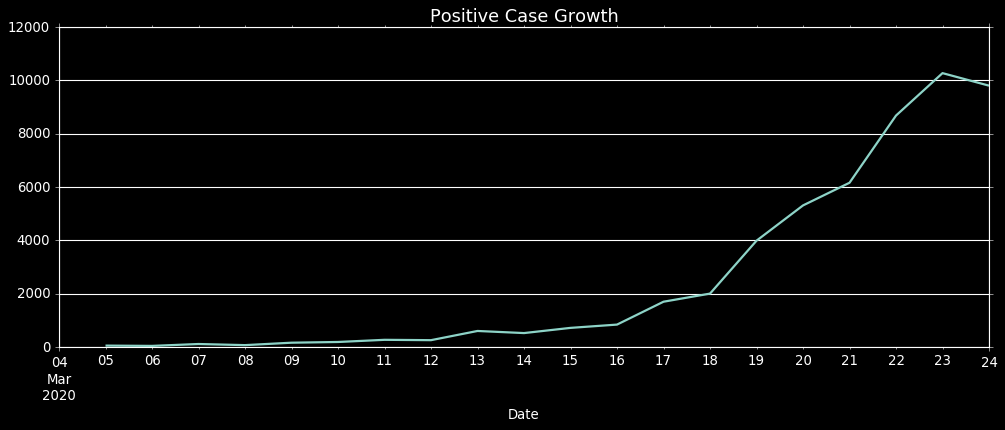

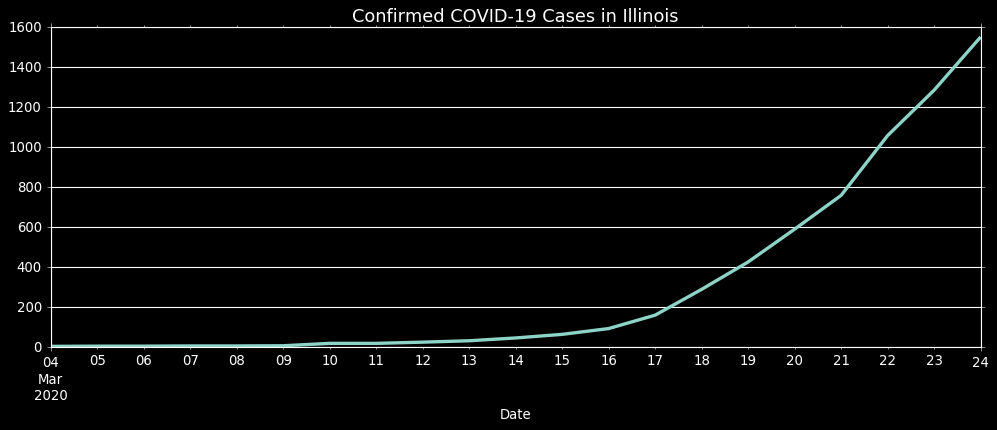

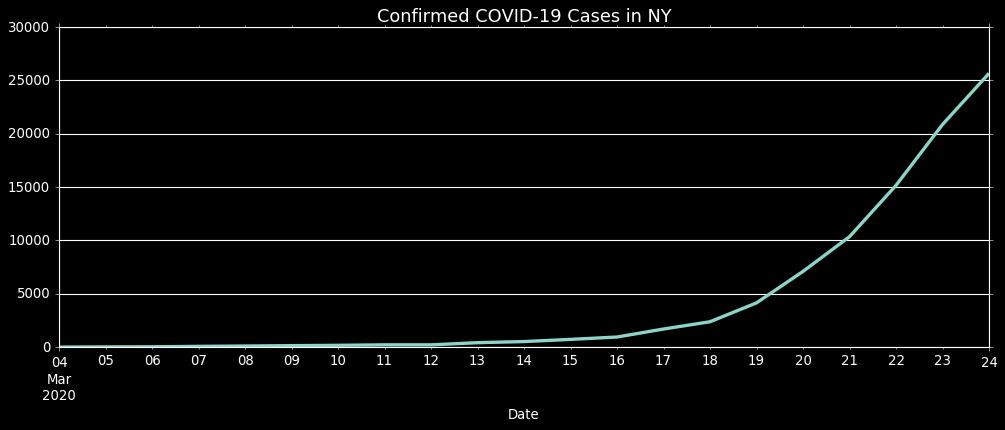

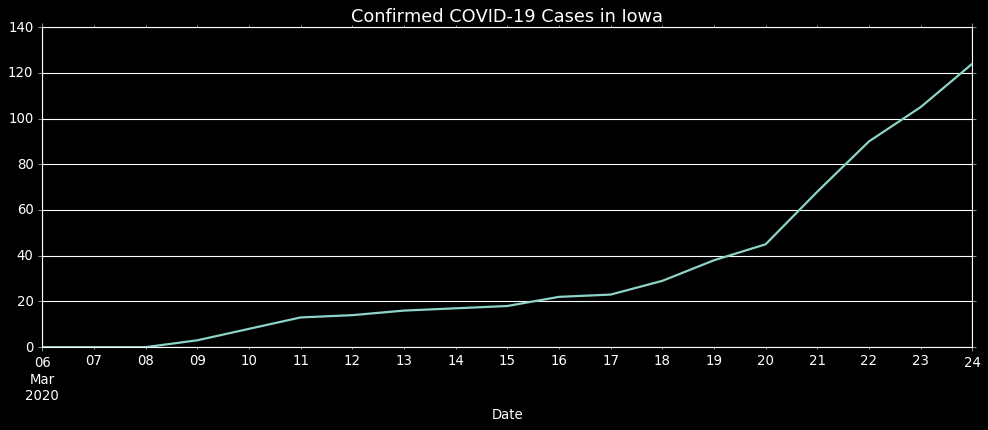

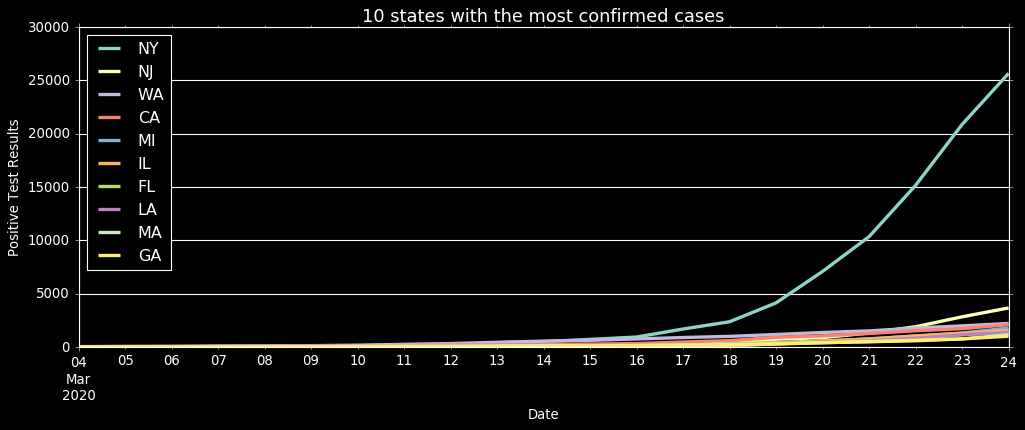

In [191]:
# ## Visualizations    
# plt.style.use('dark_background')
# with open('coronavirus.json') as f:
#     plotting = json.load(f)

# plotting = pd.DataFrame(plotting['daily_summary'])
# plotting.set_index('Date', drop = True, inplace = True)

# fig = plt.figure(figsize=(15,5))
# grouped.Positive.plot(label = 'Positive', linewidth=3)
# plt.title('Positive Test Results COVID-19')
# fig.gca()
# plt.show()
# fig.savefig('images/positive_tests.png')

# fig = plt.figure(figsize=(15,5))
# grouped.Deaths.plot()
# plt.title('US Deaths')
# plt.show()
# fig.savefig('images/deaths.png')

# fig = plt.figure(figsize=(15,5))
# grouped['diff'] = grouped.Positive.diff()
# grouped['diff'].plot()
# plt.title('Positive Case Growth')
# plt.show()
# fig.savefig('images/positive_case_growth.png')

# fig = plt.figure(figsize=(15,5))
# df[df.State == 'IL'].Positive.plot(linewidth=3)
# plt.title('Confirmed COVID-19 Cases in Illinois')
# plt.show()
# fig.savefig('images/illinois_cases.png')

# fig = plt.figure(figsize=(15,5))
# df[(df.State == 'NY')].Positive.plot(linewidth=3)
# plt.title('Confirmed COVID-19 Cases in NY');
# plt.show()
# fig.savefig('images/ny_cases.png')

# fig = plt.figure(figsize=(15,5))
# df[df.State == "IA"].Positive.plot()
# plt.title('Confirmed COVID-19 Cases in Iowa')
# plt.show()
# fig.savefig('images/ia_cases.png')

# top_ten = df.loc[df.index.max()].sort_values(by='Positive', ascending=False)[:10]
# ten_states = top_ten.State
# fig = plt.figure(figsize=(15,5))
# for state in ten_states:
#     df[df.State == state].Positive.plot(label = state, linewidth=3)
# plt.title('10 states with the most confirmed cases')
# plt.ylabel('Positive Test Results')
# plt.legend(loc='upper left')
# plt.show()
# fig.savefig('images/top_ten_states.png')

# mapping_df = df.loc[df.index.max()].groupby('State').sum()

# fig = go.Figure(data=go.Choropleth(
#     locations=mapping_df.index, # Spatial coordinates
#     z = mapping_df['Positive'], # Data to be color-coded
#     locationmode = 'USA-states', # set of locations match entries in `locations`
#     colorscale = 'Reds',
#     colorbar_title = "Confirmed Cases",
# ))

# fig.update_layout(
#     title_text = 'COVID-19 Cases by State',
#     geo_scope='usa', # limite map scope to USA
# )

# fig.show()
# fig.write_image('images/positive_cases_map.png')

# today = df.loc[df.index.max()]
# today = today.dropna(subset = ['Positive'])

# today['positive_rate'] = today.Positive/today.Total

# rates = today.sort_values(by='positive_rate', ascending = False)
# rates = rates[['State', 'positive_rate', 'Deaths', 'Positive']]

# rates = rates.set_index('State')



# colors = [Color(pick_for=x).get_hex_l() for x in rates.index]

# fig = go.Figure([go.Bar(x=rates.index, y=rates.positive_rate, marker_color=colors)])
# fig.update_layout(
#     title_text = 'Positive Test Rate'
# )
# fig.show()
# fig.write_image('images/positive_test_rate.png')

# rates['death_rate'] = rates.Deaths/rates.Positive

# rates = rates.sort_values(by='death_rate', ascending=False)

# fig = go.Figure([go.Bar(x=rates.index, y=rates.death_rate, marker_color=colors)])
# fig.update_layout(
#     title_text = 'Mortality Rate',
#     geo_scope='usa', # limite map scope to USA
# )
# fig.show()
# fig.write_image('images/mortality_rate.png')

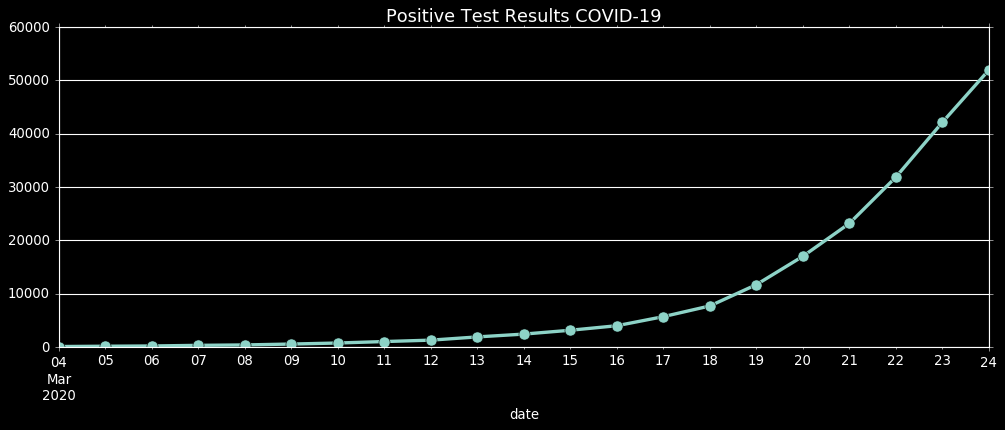

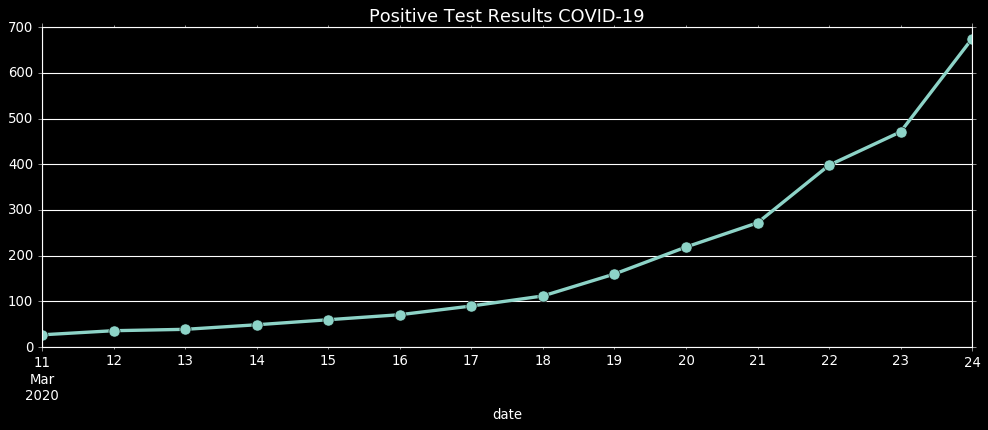

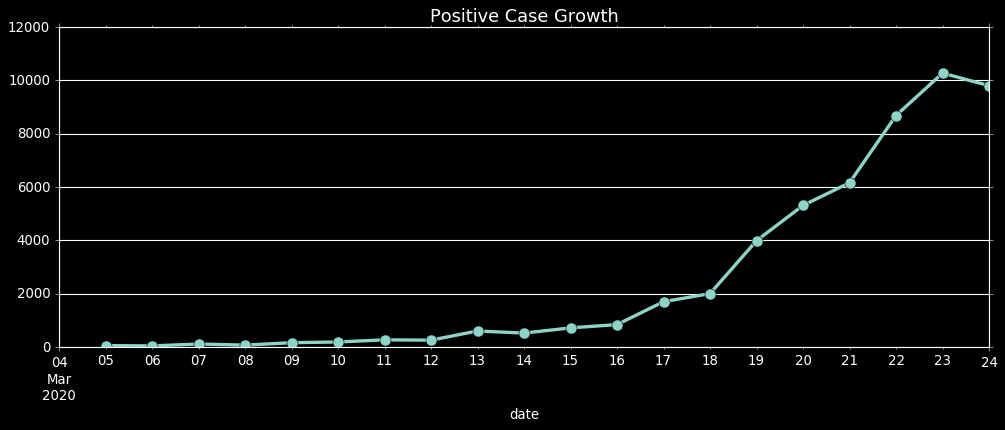

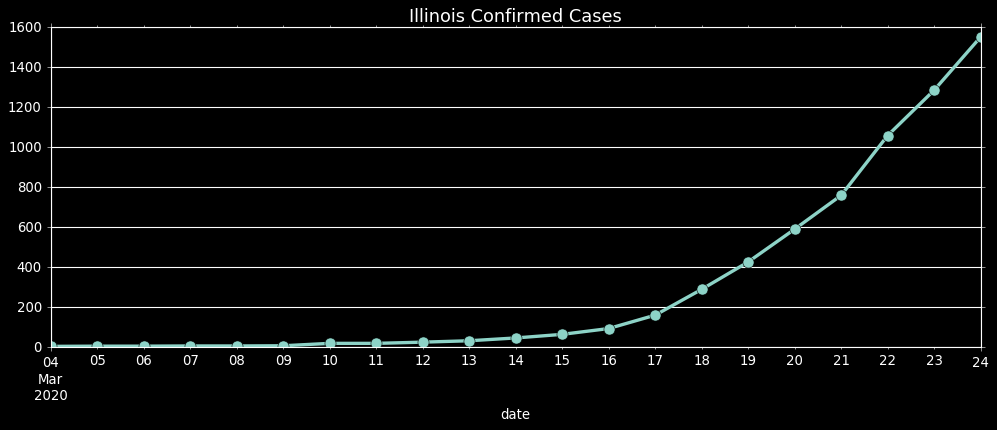

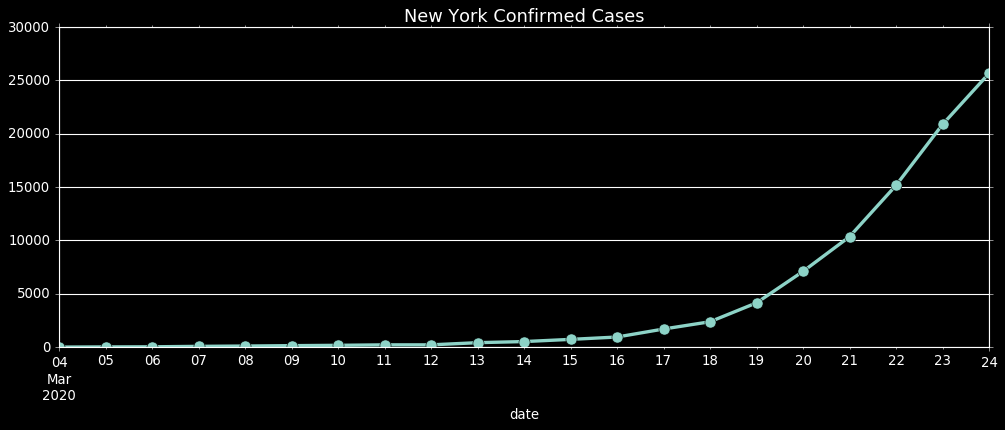

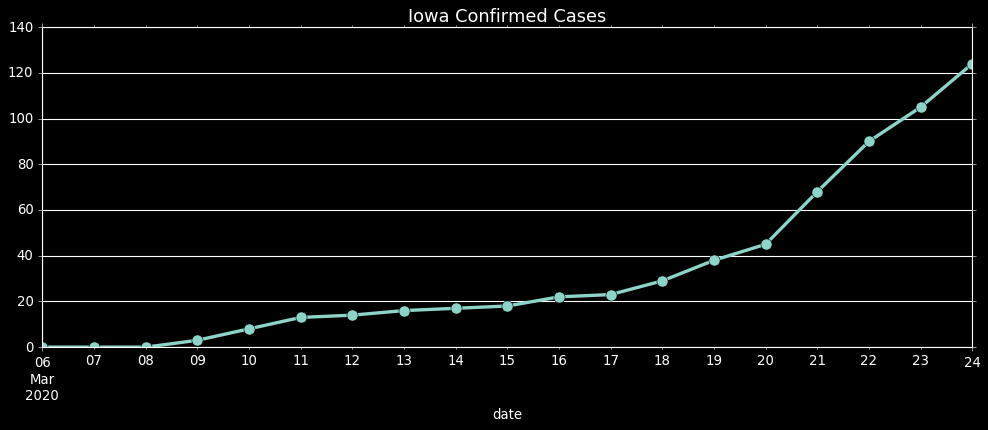

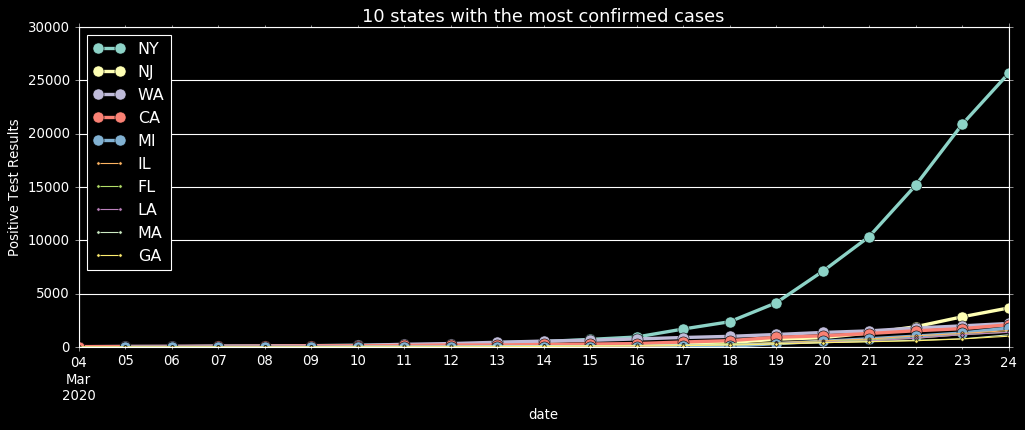

/Users/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [344]:
import requests
import pandas as pd
from colour import Color
import plotly.graph_objects as go
import matplotlib.pyplot as plt

states = requests.get('https://covidtracking.com/api/states/daily').json()
states = pd.DataFrame(states)

us = requests.get('https://covidtracking.com/api/us/daily').json()
us = pd.DataFrame(us)

states.date = pd.to_datetime(states.date, format = '%Y%m%d')
us.date = pd.to_datetime(us.date, format = '%Y%m%d')

states.set_index('date', inplace = True)
us.set_index('date', inplace =  True)
today = states.loc[states.index.max()]

fig = plt.figure(figsize=(15,5))
us.positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Test Results COVID-19')
plt.show()
fig.savefig('images/positive_tests.png')

fig = plt.figure(figsize=(15,5))
us.death.dropna().plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Test Results COVID-19')
plt.show()
fig.savefig('images/deaths.png')

us_rev = us.iloc[::-1].positive.diff()

fig = plt.figure(figsize=(15,5))
us_rev.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Case Growth')
plt.show()
fig.savefig('images/positive_case_growth.png')

fig = plt.figure(figsize=(15,5))
states[states.state == 'IL'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Illinois Confirmed Cases')
plt.show()
fig.savefig('images/illinois_cases.png')

fig = plt.figure(figsize=(15,5))
states[states.state == 'NY'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('New York Confirmed Cases')
plt.show()
fig.savefig('images/ny_cases.png')

fig = plt.figure(figsize=(15,5))
states[states.state == 'IA'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Iowa Confirmed Cases')
plt.show()
fig.savefig('images/ia_cases.png')

top_ten = today.sort_values(by='positive', ascending=False)[:10]
ten_states = top_ten.state
fig = plt.figure(figsize=(15,5))
for state in ten_states:
    if state in list(ten_states[:5].values):
        states[states.state == state].positive.plot(label = state, linewidth=3, marker = 'o', markersize=10)
    else:
        states[states.state == state].positive.plot(label = state, linewidth=1, marker = 'o', markersize=3)
plt.title('10 states with the most confirmed cases')
plt.ylabel('Positive Test Results')
plt.legend(loc='upper left')
plt.show()
fig.savefig('images/top_ten_states.png')

fig = go.Figure(data=go.Choropleth(
    locations=today.state, # Spatial coordinates
    z = today.positive, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Confirmed Cases",
))

fig.update_layout(
    title_text = 'COVID-19 Cases by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
fig.write_image('map.png')

today['positive_rate'] = today.positive/today.total

rates = today.sort_values(by='positive_rate', ascending = False)
rates = rates[['state', 'positive_rate', 'death', 'positive']]

rates = rates.set_index('state')



colors = [Color(pick_for=x).get_hex_l() for x in rates.index]

fig = go.Figure([go.Bar(x=rates.index, y=rates.positive_rate, marker_color=colors)])
fig.update_layout(
    title_text = 'Positive Test Rate'
)
fig.show()
fig.write_image('images/positive_test_rate.png')

rates['death_rate'] = rates.death/rates.positive

rates = rates.sort_values(by='death_rate', ascending=False)

fig = go.Figure([go.Bar(x=rates.index, y=rates.death_rate, marker_color=colors)])
fig.update_layout(
    title_text = 'Mortality Rate',
    geo_scope='usa', # limite map scope to USA
)
fig.show()
fig.write_image('mortality_rate.png')